# Volatility

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
import math

In [65]:
btc = pd.read_csv('bpi.csv')
def str_to_time(elem):
    day = datetime.datetime.strptime(elem, '%Y-%m-%d')
    return day

btc['Date'] = btc['Date'].apply(str_to_time)
btc = btc.set_index('Date')

In [66]:
df = pd.read_csv('df_final.csv')
df['id'] = df['id'].astype(str)
df['timestamp'] = df['timestamp'].astype(int)
df['author'] = df['author'].astype(str)
df['score'] = df['score'].astype(int)
df['comments'] = df['comments'].astype(int)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = pd.to_datetime(df['Day'])

# Making the new dataset

What should be included?
- Price of Bitcoin
- 30 Day Rolling Volatility
- Number of comments that day
- Change to the previous day
- Number of threads that day
- Change to the previous day

In [67]:
agg_coms = df.groupby('Day').sum()['comments']
ch_agg_coms = [math.nan]
ch_agg_coms_pct = [math.nan]
for i in range(1,len(agg_coms)):
    ch_agg_coms.append(agg_coms.iloc[i]-agg_coms.iloc[i-1])
    ch_agg_coms_pct.append((agg_coms.iloc[i]/agg_coms.iloc[i-1])-1)

agg_threads = df.groupby('Day').count()['id']
ch_agg_threads = [math.nan]
ch_agg_threads_pct = [math.nan]
for i in range(1, len(agg_threads)):
    ch_agg_threads.append(agg_threads.iloc[i]-agg_threads.iloc[i-1])
    ch_agg_threads_pct.append((agg_threads.iloc[i]/agg_threads.iloc[i-1])-1)
    
ch_btc = [math.nan]
ch_btc_pct = [math.nan]
for i in range(1, len(btc['BPI'])):
    ch_btc.append(btc['BPI'].iloc[i]-btc['BPI'].iloc[i-1])
    ch_btc_pct.append((btc['BPI'].iloc[i]/btc['BPI'].iloc[i-1])-1)

In [68]:
vola = pd.DataFrame(ch_btc_pct).rolling(30).std()*np.sqrt(30)
vola.index = btc.index

In [69]:
vola

,0
Date,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
...,...
2020-12-27,0.201219
2020-12-28,0.200894
2020-12-29,0.200589


In [70]:
ch_vola = [math.nan]
for i in range(1, len(vola)):
    ch_vola.append((vola.iloc[i]-vola.iloc[i-1])[0])

In [71]:
ch_vola

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.00047882311212638085,
 0.00011353916972539624,
 -0.00016967815013330112,
 0.006454127813451949,
 3.9088228492467625e-05,
 -0.009258702040002509,
 -5.084024416401878e-06,
 3.7319786962419776e-05,
 0.00020910357310982564,
 0.0010170158514315464,
 -0.0019168893229812856,
 0.000629071792917657,
 0.001379450747148181,
 -0.06162534109679499,
 -0.01566565376366752,
 -0.00043596955198019205,
 0.00045702067149711034,
 -0.0014200104029722105,
 -0.03745959097115256,
 0.0032591334109299264,
 -0.02091900773978554,
 -1.1513439726079655e-05,
 0.0017576117451135465,
 -0.004170054774012499,
 0.00010266362492089565,
 0.001178196655662725,
 -0.008153943507809708,
 -0.00022597612076470652,
 -0.00023389393037551165,
 -0.00404071945506311,
 0.005001924818191131,
 0.000408634079612058,
 0.0035281592734247996,
 -0.008819422

In [72]:
ds = pd.DataFrame()
ds['BTC'] = btc['BPI']
ds['BTC_ch'] = ch_btc
ds['BTC_ch_p'] = ch_btc_pct
ds['BTC_vola'] = vola
ds['BTC_vola_ch'] = ch_vola

ds['Comments'] = agg_coms
ds['Comments_ch'] = ch_agg_coms
ds['Comments_ch_p'] = ch_agg_coms_pct

ds['Threads'] = agg_threads
ds['Threads_ch'] = ch_agg_threads
ds['Threads_ch_p'] = ch_agg_threads_pct

In [73]:
ds = ds[ds.index<'2020-01-01']

In [74]:
ds.corr()

,BTC,BTC_ch,BTC_ch_p,BTC_vola,BTC_vola_ch,Comments,Comments_ch,Comments_ch_p,Threads,Threads_ch,Threads_ch_p
BTC,1.000000,0.035846,0.010680,0.530053,-0.000126,0.474627,-0.011333,-0.013820,0.472211,-0.007384,-0.015159
BTC_ch,0.035846,1.000000,0.823555,0.008040,0.032405,0.025301,-0.073672,-0.054386,0.062442,0.059358,0.029633
BTC_ch_p,0.010680,0.823555,1.000000,0.017709,0.062440,0.029846,-0.056640,-0.050896,0.057963,0.044736,0.029862
BTC_vola,0.530053,0.008040,0.017709,1.000000,0.066148,0.502403,-0.022472,-0.019919,0.472748,-0.020641,-0.027128
BTC_vola_ch,-0.000126,0.032405,0.062440,0.066148,1.000000,0.168276,0.169178,0.193681,0.155418,0.165684,0.195060
Comments,0.474627,0.025301,0.029846,0.502403,0.168276,1.000000,0.243500,0.187701,0.968141,0.215249,0.155355
Comments_ch,-0.011333,-0.073672,-0.056640,-0.022472,0.169178,0.243500,1.000000,0.665728,0.173562,0.810389,0.473058
Comments_ch_p,-0.013820,-0.054386,-0.050896,-0.019919,0.193681,0.187701,0.665728,1.000000,0.105284,0.423426,0.626692
Threads,0.472211,0.062442,0.057963,0.472748,0.155418,0.968141,0.173562,0.105284,1.000000,0.235580,0.167229
Threads_ch,-0.007384,0.059358,0.044736,-0.020641,0.165684,0.215249,0.810389,0.423426,0.235580,1.000000,0.603423


In [75]:
import seaborn as sns

In [76]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

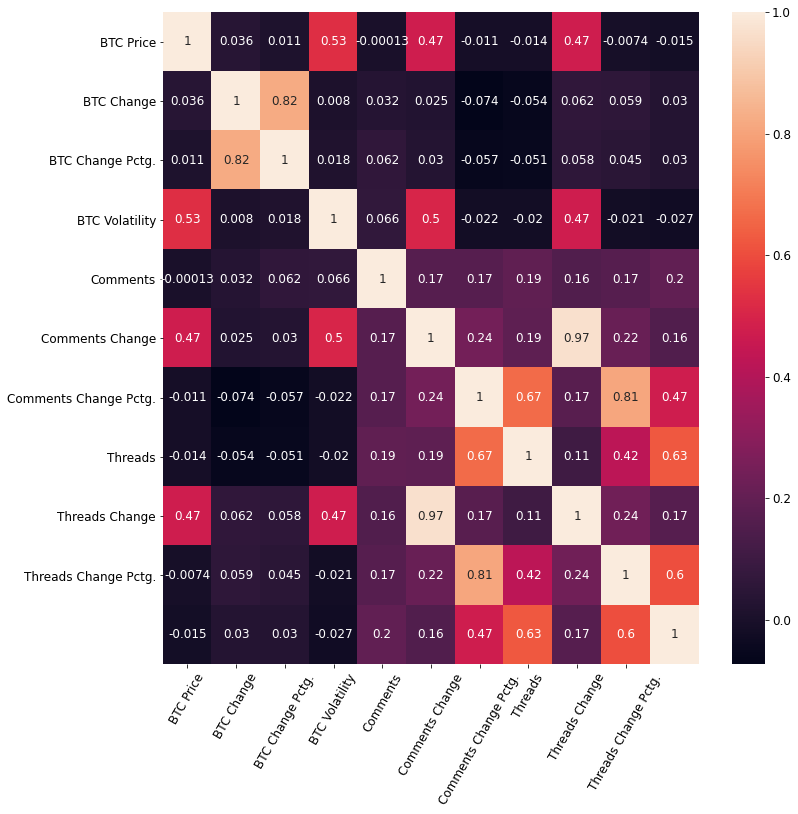

In [77]:
ticklabels=['BTC Price', 'BTC Change','BTC Change Pctg.',
    'BTC Volatility', 'Comments', 'Comments Change', 
    'Comments Change Pctg.', 'Threads', 'Threads Change', 
    'Threads Change Pctg.']

plt.figure(figsize=(12,12))
hm = sns.heatmap(ds.corr(), annot=True,
    xticklabels = ticklabels,
    yticklabels = ticklabels)

hm.set_xticklabels(hm.get_xticklabels(), rotation=60);
hm.set_yticklabels(hm.get_yticklabels(), rotation=0);

In [78]:
# Volatility

In [79]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

Text(0, 0.5, 'Volatility')

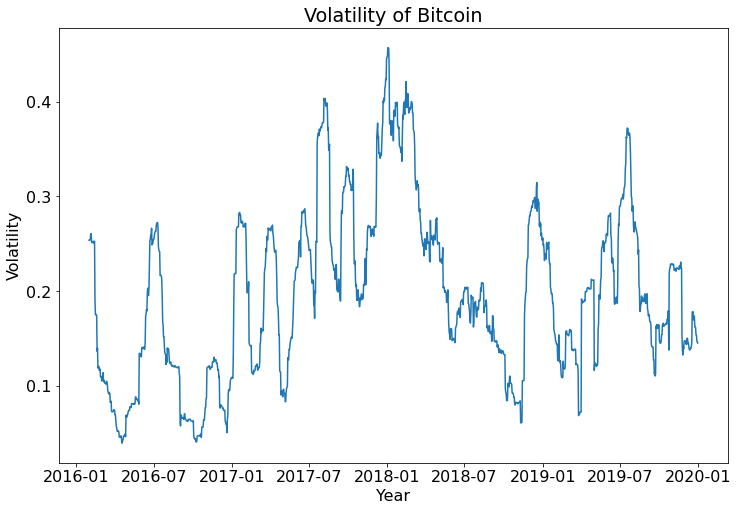

In [80]:
plt.figure(figsize=(12,8))
plt.plot(ds['BTC_vola'])
plt.title('Volatility of Bitcoin')
plt.xlabel('Year')
plt.ylabel('Volatility')

In [81]:
ds

,BTC,BTC_ch,BTC_ch_p,BTC_vola,BTC_vola_ch,Comments,Comments_ch,Comments_ch_p,Threads,Threads_ch,Threads_ch_p
Date,,,,,,,,,,,
2016-01-01,434.4630,NaN,NaN,NaN,NaN,1588,NaN,NaN,132,NaN,NaN
2016-01-02,433.5860,-0.8770,-0.002019,NaN,NaN,1625,37.0,0.023300,160,28.0,0.212121
2016-01-03,430.3610,-3.2250,-0.007438,NaN,NaN,1661,36.0,0.022154,169,9.0,0.056250
2016-01-04,433.4930,3.1320,0.007278,NaN,NaN,1690,29.0,0.017459,203,34.0,0.201183
2016-01-05,432.2530,-1.2400,-0.002860,NaN,NaN,2479,789.0,0.466864,208,5.0,0.024631
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7259.6700,53.8667,0.007475,0.153853,-0.007940,1347,-1128.0,-0.455758,138,-6.0,-0.041667
2019-12-28,7313.6933,54.0233,0.007442,0.153634,-0.000220,1519,172.0,0.127691,159,21.0,0.152174
2019-12-29,7397.5350,83.8417,0.011464,0.147227,-0.006406,1300,-219.0,-0.144174,117,-42.0,-0.264151
